In [0]:
from PIL import Image
import binascii
from binascii import unhexlify
import codecs
import optparse

def rgb2hex(r, g, b):
  return '#' + bytes((r, g, b)).hex()

def hex2rgb(hexcode):
  return unhexlify(hexcode[1:])

def str2bin(message):
  binary = bin(int(message.encode().hex(), 16))
  return binary[2:]

def bin2str(binary):
  message = unhexlify(hex(int(binary, 2))[2:])
  return message

def encode(hexcode, digit):
  if hexcode[-1] in ('0', '1', '2', '3', '4', '5'):
    hexcode = hexcode[:-1] + digit
    return hexcode
  else:
    return None

def decode(hexcode):
  if hexcode[-1] in ('0', '1'):
    return hexcode[-1]
  else:
    return None

def hide(image, message):
  img = image
  binary = str2bin(message) + '1111111111111110'
  if img.mode in ('RGBA'):
    img = img.convert('RGBA')
    datas = img.getdata()
    newdata = []
    digit = 0
    temp = ''
    for item in datas:
      if (digit < len(binary)):
        newpix = encode(rgb2hex(item[0],item[1],item[2]),binary[digit])
        if newpix == None:
          newdata.append(item)
        else:
          r, g, b = hex2rgb(newpix)
          newdata.append((r,g,b,255))
          digit += 1
      else:
        newdata.append(item)
    img.putdata(newdata)
    return img
  raise ValueError('Incorrect Image Mode, Couldn\'t Hide')

def retr(image):
  img = image
  binary = ''

  if img.mode in ('RGBA'):
    img = img.convert('RGBA')
    datas = img.getdata()

    for item in datas:
      digit = decode(rgb2hex(item[0], item[1], item[2]))
      if digit == None:
        pass
      else:
        binary = binary + digit
        if (binary[-16:] == '1111111111111110'):
          return bin2str(binary[:-16])

    return bin2str(binary)
  raise ValueError('Incorrect Image Mode, Couldn\'t Retrieve')

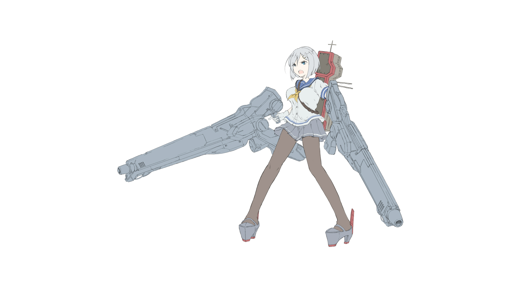

In [38]:
img = Image.open('Безымянный.png')

imgmsg = hide(img, 'hello world!')

thumb = imgmsg.copy()
thumb.thumbnail((512, 512))
thumb

In [39]:
msg = retr(imgmsg)
msg

b'hello world!'